In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [66]:
#abaikan
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [67]:
df = pd.read_csv("https://raw.githubusercontent.com/basisdatalab/StudyGroupDS21/main/Week3/train_titanic.csv")

In [68]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### data dictonary
PassengerId: unique id number to each passenger<br>
Survived: passenger survive(1) or died(0)<br>
Pclass: passenger class<br>
Name: name<br>
Sex: gender of passenger<br>
Age: age of passenger<br>
SibSp: number of siblings/spouses<br>
Parch: number of parents/children<br>
Ticket: ticket number<br>
Fare: amount of money spent on ticket<br>
Cabin: cabin category<br>
Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


di age,emarked masi ada null. nah kita isi karna datanya lumayan banyak buat dijadiin fitur

kita liat dulu sebaran age kalo normal kita isi pake mean sedangkan kalo gak normal atau banyak pencilan kita isi pake median

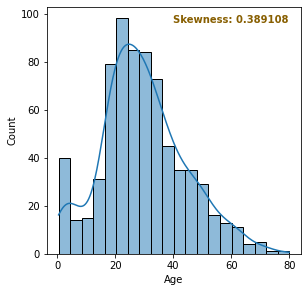

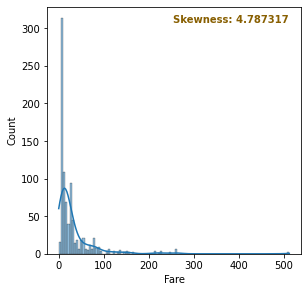

In [70]:
plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.histplot(df['Age'],kde=True)
plt.text(x=0.95, y=0.97,transform=ax1.transAxes ,s="Skewness: %f" % df['Age'].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.show()

plt.figure(figsize=(10, 10))
ax2=plt.subplot(222)
sns.histplot(df['Fare'],kde=True)
plt.text(x=0.95, y=0.97,transform=ax2.transAxes, s="Skewness: %f" % df['Fare'].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')

plt.show()

In [71]:
def findOutliner(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1

  count=((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).sum()
  percentage=round(((count/len(x))*100),2)
  return count,percentage

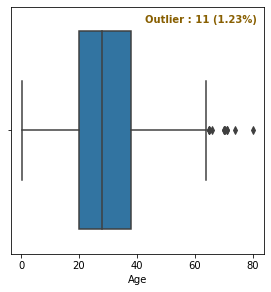

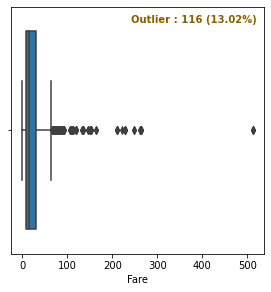

In [72]:
plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.boxplot(data=df,x='Age')
plt.text(x=0.97, y=0.97,transform=ax1.transAxes,s=f"Outlier : {findOutliner(df['Age'])[0]} ({findOutliner(df['Age'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')

plt.show()




plt.figure(figsize=(10, 10))
ax2=plt.subplot(222)
sns.boxplot(data=df,x='Fare')
plt.text(x=0.97, y=0.97,transform=ax2.transAxes,s=f"Outlier : {findOutliner(df['Fare'])[0]} ({findOutliner(df['Fare'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')

plt.show()


In [73]:
#ubah outlier jadi Q3 aja
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

df.loc[df['Age']>(Q3+ 1.5 * IQR),'Age']=Q3

In [74]:
#buang 1 titik terjauh di fare
df=df.loc[df['Fare']<400,:]

kita bisa katakan bahwa data cenderung normal karena itu kita dapat mengisinya dengan mean

In [75]:
df['Age']=df['Age'].fillna(df['Age'].mean())

sekarang kita mau isi yang embarked karena data nya kategori kita pake mode

In [76]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())

PassengerId sama tiket gak kepake jadi apus aja

In [77]:
df.drop(['PassengerId','Ticket','Cabin'],inplace=True,axis=1)


Kita buat fitur baru FamilySize

In [78]:
df['FamilySize']=df['SibSp']+df['Parch']+1

#karna udah ada fitur family size kita drop aja SibSp ama Parch
df.drop(['SibSp','Parch'],inplace=True,axis=1)

kalau sendirian kita kasi tanda

In [79]:
df['sendirian']=0
df.loc[df['FamilySize']==1,'sendirian']=1

 Ambil Title

In [80]:
import re
def getTitle(name):
    #intinya nyari huruf yang diakhiri titik
    title = re.search(' ([A-Za-z]+\.)', name)
    
    if title:
        return title.group(1)
    return ""

In [81]:
df['Name']=df['Name'].apply(lambda x : getTitle(x))

In [82]:
df['Name'].value_counts()

Mr.          515
Miss.        181
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Don.           1
Capt.          1
Sir.           1
Ms.            1
Jonkheer.      1
Mme.           1
Countess.      1
Lady.          1
Name: Name, dtype: int64

In [83]:
#karna master kebawah dikit kita kelompokan
otherTitle=df['Name'].unique()[3:]
df['Name']=df['Name'].replace(otherTitle,'other')
df


,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,sendirian
0,0,3,Mr.,male,22.000000,7.2500,S,2,0
1,1,1,Mrs.,female,38.000000,71.2833,C,2,0
2,1,3,Miss.,female,26.000000,7.9250,S,1,1
3,1,1,Mrs.,female,35.000000,53.1000,S,2,0
4,0,3,Mr.,male,35.000000,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,other,male,27.000000,13.0000,S,1,1
887,1,1,Miss.,female,19.000000,30.0000,S,1,1
888,0,3,Miss.,female,29.183783,23.4500,S,4,0
889,1,1,Mr.,male,26.000000,30.0000,C,1,1


#EDA 

disini kita mulai edanya kita mulai dari mau tau berapa si yang survive

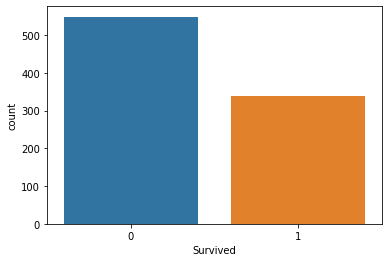

In [84]:
sns.countplot(data=df,x='Survived')

kita kemudian bandingin sama variable yang ada banding survived aku suka aja si pake factor plot kalo bandingin 2 variable category

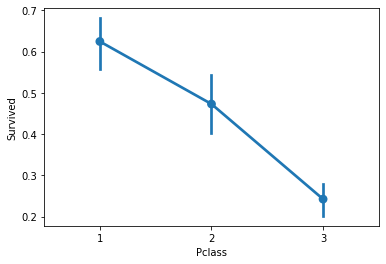

In [85]:
sns.pointplot(data=df[['Pclass', 'Survived']],x='Pclass',y='Survived')
plt.show()

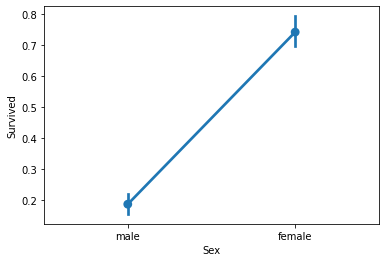

In [86]:
sns.pointplot(data=df[['Sex', 'Survived']],x='Sex',y='Survived')
plt.show()

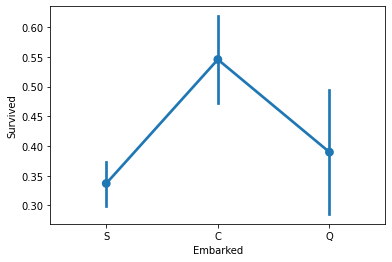

In [87]:
sns.pointplot(data=df[['Embarked', 'Survived']],x='Embarked',y='Survived')
plt.show()

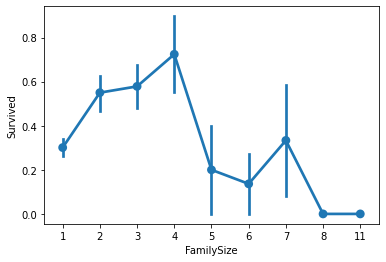

In [88]:
sns.pointplot(data=df[['FamilySize', 'Survived']],x='FamilySize',y='Survived')
plt.show()

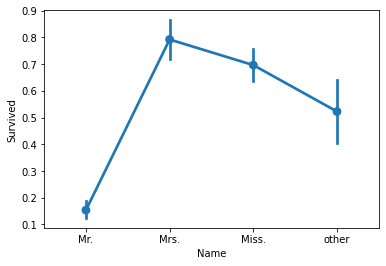

In [89]:
sns.pointplot(data=df[['Name', 'Survived']],x='Name',y='Survived')
plt.show()

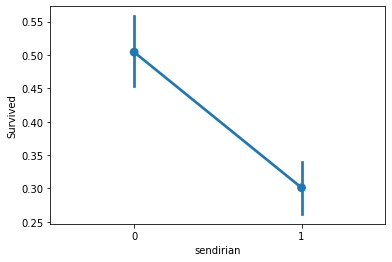

In [90]:
sns.pointplot(data=df[['sendirian', 'Survived']],x='sendirian',y='Survived')
plt.show()

# Preprocess Lagi

In [91]:
df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,sendirian
0,0,3,Mr.,male,22.000000,7.2500,S,2,0
1,1,1,Mrs.,female,38.000000,71.2833,C,2,0
2,1,3,Miss.,female,26.000000,7.9250,S,1,1
3,1,1,Mrs.,female,35.000000,53.1000,S,2,0
4,0,3,Mr.,male,35.000000,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,other,male,27.000000,13.0000,S,1,1
887,1,1,Miss.,female,19.000000,30.0000,S,1,1
888,0,3,Miss.,female,29.183783,23.4500,S,4,0
889,1,1,Mr.,male,26.000000,30.0000,C,1,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    888 non-null    int64  
 1   Pclass      888 non-null    int64  
 2   Name        888 non-null    object 
 3   Sex         888 non-null    object 
 4   Age         888 non-null    float64
 5   Fare        888 non-null    float64
 6   Embarked    886 non-null    object 
 7   FamilySize  888 non-null    int64  
 8   sendirian   888 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 109.4+ KB


ubah semua yang string jadi integer

In [93]:
df.select_dtypes('object')

,Name,Sex,Embarked
0,Mr.,male,S
1,Mrs.,female,C
2,Miss.,female,S
3,Mrs.,female,S
4,Mr.,male,S
...,...,...,...
886,other,male,S
887,Miss.,female,S
888,Miss.,female,S
889,Mr.,male,C


data diperlakukan berbeda tiap jenis nya untuk jenis nominal >2 akan dibuat sebuah kolom baru sedangkan untuk ordinal diurutkan dalam bentuk integer sesuai dengan tingkatannya JANGAN MEMPERLAKUKAN NOMINAL SAMA SEPERTI ORDINAL

In [94]:
df['Sex']=df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [95]:
oneHotTitle=pd.get_dummies(df['Name'], prefix='Title')
oneHotEmbarked=pd.get_dummies(df['Embarked'], prefix='Embarked')
df.drop(['Name','Embarked'],inplace=True,axis=1)
oneHotTitle

,Title_Miss.,Title_Mr.,Title_Mrs.,Title_other
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
886,0,0,0,1
887,1,0,0,0
888,1,0,0,0
889,0,1,0,0


In [96]:
bersih = pd.concat([df,oneHotTitle,oneHotEmbarked],axis=1)
bersih

,Survived,Pclass,Sex,Age,Fare,FamilySize,sendirian,Title_Miss.,Title_Mr.,Title_Mrs.,Title_other,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,7.2500,2,0,0,1,0,0,0,0,1
1,1,1,0,38.000000,71.2833,2,0,0,0,1,0,1,0,0
2,1,3,0,26.000000,7.9250,1,1,1,0,0,0,0,0,1
3,1,1,0,35.000000,53.1000,2,0,0,0,1,0,0,0,1
4,0,3,1,35.000000,8.0500,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,1,1,0,0,0,1,0,0,1
887,1,1,0,19.000000,30.0000,1,1,1,0,0,0,0,0,1
888,0,3,0,29.183783,23.4500,4,0,1,0,0,0,0,0,1
889,1,1,1,26.000000,30.0000,1,1,0,1,0,0,1,0,0


## scale

In [97]:
# kita scale yang gede2 itu
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bersih[['Age','Fare']]=scaler.fit_transform(bersih[['Age','Fare']])


In [98]:
bersih

,Survived,Pclass,Sex,Age,Fare,FamilySize,sendirian,Title_Miss.,Title_Mr.,Title_Mrs.,Title_other,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0.339415,0.027567,2,0,0,1,0,0,0,0,1
1,1,1,0,0.591066,0.271039,2,0,0,0,1,0,1,0,0
2,1,3,0,0.402328,0.030133,1,1,1,0,0,0,0,0,1
3,1,1,0,0.543882,0.201901,2,0,0,0,1,0,0,0,1
4,0,3,1,0.543882,0.030608,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0.418056,0.049430,1,1,0,0,0,1,0,0,1
887,1,1,0,0.292230,0.114068,1,1,1,0,0,0,0,0,1
888,0,3,0,0.452403,0.089163,4,0,1,0,0,0,0,0,1
889,1,1,1,0.402328,0.114068,1,1,0,1,0,0,1,0,0


## split x dan y

In [99]:
y,x=(bersih['Survived'],bersih.iloc[:,1:])

In [100]:
y[0]

0

In [101]:
x.head(1)

,Pclass,Sex,Age,Fare,FamilySize,sendirian,Title_Miss.,Title_Mr.,Title_Mrs.,Title_other,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0.339415,0.027567,2,0,0,1,0,0,0,0,1


## Split buat test

In [102]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.33)

# modeling


Cari model terbaik buat data kita

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


In [104]:
#define model

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True,C=2),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	  AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression()]

In [105]:
tempAcc = {}

for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(x_train, y_train)
		pred = clf.predict(x_test)
		acc = accuracy_score(y_test, pred)
		if name in tempAcc:
			tempAcc[name] += acc
		else:
			tempAcc[name] = acc

In [106]:
res=pd.DataFrame(tempAcc.items(),columns=['clf','acc']).sort_values('acc',ascending=False)
res

,clf,acc
0,KNeighborsClassifier,0.846939
5,GradientBoostingClassifier,0.843537
1,SVC,0.840136
3,RandomForestClassifier,0.829932
7,LogisticRegression,0.812925
4,AdaBoostClassifier,0.809524
2,DecisionTreeClassifier,0.799320
6,GaussianNB,0.795918


In [107]:
clf=SVC(probability=True,C=2)
clf.fit(x_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# pipeline

oke berarti kita pake model ini aja terus kita buat pipelinenya

In [108]:
scaler.data_min_

array([0.42, 0.  ])

In [109]:
def model_pipeline(pclass,title,sex,umur,fare,fz,embarked,scaler,model):
    umur,fare=scaler.transform(np.array([[umur,fare]]))[0]
    sendirian=0
    if fz<2:
        sendirian=1
    miss=0
    mr=0
    mrs=0
    other=0

    if title==1:
      miss=1
    elif title==2:
      mr=1
    elif title==3:
      mrs=1
    else:
      other=1

    c=0
    q=0
    s=0
    if embarked==1:
      c=1
    elif embarked==2:
      q=1
    else:
      s=1

    inp=np.array([pclass,sex,umur,fare,fz,sendirian,miss,mr,mrs,other,c,q,s]).reshape(1,-1)


    return model.predict(inp)
  

In [110]:
bersih.head(1)

,Survived,Pclass,Sex,Age,Fare,FamilySize,sendirian,Title_Miss.,Title_Mr.,Title_Mrs.,Title_other,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0.339415,0.027567,2,0,0,1,0,0,0,0,1


In [111]:
x_train[1]

array([3.        , 0.        , 0.27650204, 0.06768061, 2.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        ])

In [112]:
y_train[1]

0

In [113]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,FamilySize,sendirian
0,0,3,1,22.0,7.2500,2,0
1,1,1,0,38.0,71.2833,2,0


In [114]:
pclass=int(input('masukan pclass: '))
title=int(input('title   (1.miss/2.mr/3.mrs/4.other): '))
sex=int(input('jenis kelamin (1 laki/ 0 wanita) '))
umur=int(input('masukin umur: '))
fare=float(input('harga tiket: '))
fz=int(input('family size: '))
embarked=int(input('asal (1.C/2.Q/3.S): '))



print('\n\n\noutput')
model_pipeline(pclass,title,sex,umur,fare,fz,embarked,scaler,clf)


KeyboardInterrupt: ignored

# simpan obj

In [ ]:
import pickle
pickle.dump(scaler,open('scalerObj.pickle','wb'))
pickle.dump(clf,open('clfObj.pickle','wb'))


#cara load

In [ ]:
scalerTes = pickle.load(open('scalerObj.pickle','rb'))
clfTes = pickle.load(open('clfObj.pickle','rb'))

In [ ]:
umur,fare=scaler.transform(np.array([[38.000000,71.2833]]))[0]

In [ ]:
clfTes.predict(np.array([1,0,umur,fare,2,0,0,0,1,0,1,0,0]).reshape(1,-1))

# TUGAS LANJUTAN<br>
dari tugas kemaren coba kalian buat model dari FE yang udah kalian buat